In [55]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [56]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [57]:
"""
Database Connection
"""
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [58]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,20080.38,20091.87,20060.00,20075.37,203.35758,-0.0249497270470083,1666943699999,3923.0,94.18263,1.666944e+09
1,2,BTCBUSD,20075.16,20077.53,20062.10,20073.19,128.87814,-0.00981312228645333,1666943759999,2683.0,63.66870,1.666944e+09
2,3,BTCBUSD,20074.14,20099.09,20071.70,20082.84,210.23082,0.0433393410626843,1666943819999,3028.0,123.34956,1.666944e+09
3,4,BTCBUSD,20082.76,20086.49,20062.34,20066.29,146.53881,-0.0820106399717844,1666943879999,2552.0,58.58667,1.666944e+09
4,5,BTCBUSD,20065.00,20087.12,20064.88,20082.74,143.95663,0.0884126588587172,1666943939999,2751.0,78.05589,1.666944e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
43328,43329,BTCBUSD,16534.91,16540.25,16534.81,16535.87,27.35995,0.00580589794561402,1669544879999,752.0,13.10971,1.669545e+09
43329,43330,BTCBUSD,16536.87,16537.26,16530.73,16533.12,27.87742,-0.0226766008319591,1669544939999,656.0,11.43652,1.669545e+09
43330,43331,BTCBUSD,16533.11,16533.84,16527.64,16530.54,36.93505,-0.0155445648156923,1669544999999,719.0,13.64113,1.669545e+09
43331,43332,BTCBUSD,16531.68,16532.28,16527.20,16531.43,36.72428,-0.00151224799899345,1669545059999,918.0,19.68017,1.669545e+09


In [59]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,20080.38,20091.87,20060.00,20075.37,203.35758,-0.0249497270470083,1666943699999,3923.0,94.18263,1.666944e+09
1,2,BTCBUSD,20075.16,20077.53,20062.10,20073.19,128.87814,-0.00981312228645333,1666943759999,2683.0,63.66870,1.666944e+09
2,3,BTCBUSD,20074.14,20099.09,20071.70,20082.84,210.23082,0.0433393410626843,1666943819999,3028.0,123.34956,1.666944e+09
3,4,BTCBUSD,20082.76,20086.49,20062.34,20066.29,146.53881,-0.0820106399717844,1666943879999,2552.0,58.58667,1.666944e+09
4,5,BTCBUSD,20065.00,20087.12,20064.88,20082.74,143.95663,0.0884126588587172,1666943939999,2751.0,78.05589,1.666944e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
43328,43329,BTCBUSD,16534.91,16540.25,16534.81,16535.87,27.35995,0.00580589794561402,1669544879999,752.0,13.10971,1.669545e+09
43329,43330,BTCBUSD,16536.87,16537.26,16530.73,16533.12,27.87742,-0.0226766008319591,1669544939999,656.0,11.43652,1.669545e+09
43330,43331,BTCBUSD,16533.11,16533.84,16527.64,16530.54,36.93505,-0.0155445648156923,1669544999999,719.0,13.64113,1.669545e+09
43331,43332,BTCBUSD,16531.68,16532.28,16527.20,16531.43,36.72428,-0.00151224799899345,1669545059999,918.0,19.68017,1.669545e+09


In [60]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
# df_candle

In [61]:
# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

In [62]:
# mpf.plot(
#     df_candle.tail(5),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [63]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-10-28 07:54:59.999,1,BTCBUSD,20080.38,20091.87,20060.00,20075.37,203.35758,-0.0249497270470083,3923.0,94.18263,1.666944e+09
2022-10-28 07:55:59.999,2,BTCBUSD,20075.16,20077.53,20062.10,20073.19,128.87814,-0.00981312228645333,2683.0,63.66870,1.666944e+09
2022-10-28 07:56:59.999,3,BTCBUSD,20074.14,20099.09,20071.70,20082.84,210.23082,0.0433393410626843,3028.0,123.34956,1.666944e+09
2022-10-28 07:57:59.999,4,BTCBUSD,20082.76,20086.49,20062.34,20066.29,146.53881,-0.0820106399717844,2552.0,58.58667,1.666944e+09
2022-10-28 07:58:59.999,5,BTCBUSD,20065.00,20087.12,20064.88,20082.74,143.95663,0.0884126588587172,2751.0,78.05589,1.666944e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 10:27:59.999,43329,BTCBUSD,16534.91,16540.25,16534.81,16535.87,27.35995,0.00580589794561402,752.0,13.10971,1.669545e+09
2022-11-27 10:28:59.999,43330,BTCBUSD,16536.87,16537.26,16530.73,16533.12,27.87742,-0.0226766008319591,656.0,11.43652,1.669545e+09
2022-11-27 10:29:59.999,43331,BTCBUSD,16533.11,16533.84,16527.64,16530.54,36.93505,-0.0155445648156923,719.0,13.64113,1.669545e+09


In [28]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

CloseTime
2022-10-28 08:12:59.999    100
2022-10-28 08:28:59.999    100
2022-10-28 08:42:59.999    100
2022-10-28 08:45:59.999    100
2022-10-28 08:48:59.999    100
                          ... 
2022-11-27 09:35:59.999   -100
2022-11-27 09:53:59.999   -100
2022-11-27 10:05:59.999   -100
2022-11-27 10:26:59.999   -100
2022-11-27 10:28:59.999   -100
Length: 4343, dtype: int32

In [30]:
# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


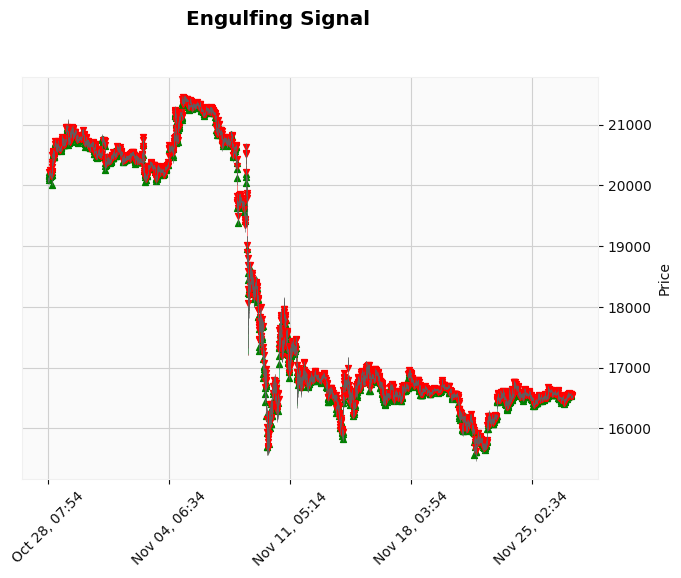

In [31]:
# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [58]:
# dir(talib)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [67]:
df = df.head(100)
print(df)

                          Id   Symbol      Open      High       Low     Close  \
CloseTime                                                                       
2022-10-28 07:54:59.999    1  BTCBUSD  20080.38  20091.87  20060.00  20075.37   
2022-10-28 07:55:59.999    2  BTCBUSD  20075.16  20077.53  20062.10  20073.19   
2022-10-28 07:56:59.999    3  BTCBUSD  20074.14  20099.09  20071.70  20082.84   
2022-10-28 07:57:59.999    4  BTCBUSD  20082.76  20086.49  20062.34  20066.29   
2022-10-28 07:58:59.999    5  BTCBUSD  20065.00  20087.12  20064.88  20082.74   
...                      ...      ...       ...       ...       ...       ...   
2022-10-28 09:29:59.999   96  BTCBUSD  20222.83  20225.51  20217.82  20218.84   
2022-10-28 09:30:59.999   97  BTCBUSD  20219.94  20230.53  20215.61  20227.98   
2022-10-28 09:31:59.999   98  BTCBUSD  20228.00  20232.37  20223.10  20227.94   
2022-10-28 09:32:59.999   99  BTCBUSD  20226.97  20227.83  20209.77  20215.71   
2022-10-28 09:33:59.999  100

In [68]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)    

[CloseTime
2022-10-28 07:54:59.999    0
2022-10-28 07:55:59.999    0
2022-10-28 07:56:59.999    0
2022-10-28 07:57:59.999    0
2022-10-28 07:58:59.999    0
                          ..
2022-10-28 09:29:59.999    0
2022-10-28 09:30:59.999    0
2022-10-28 09:31:59.999    0
2022-10-28 09:32:59.999    0
2022-10-28 09:33:59.999    0
Length: 100, dtype: int32, CloseTime
2022-10-28 07:54:59.999    0
2022-10-28 07:55:59.999    0
2022-10-28 07:56:59.999    0
2022-10-28 07:57:59.999    0
2022-10-28 07:58:59.999    0
                          ..
2022-10-28 09:29:59.999    0
2022-10-28 09:30:59.999    0
2022-10-28 09:31:59.999    0
2022-10-28 09:32:59.999    0
2022-10-28 09:33:59.999    0
Length: 100, dtype: int32, CloseTime
2022-10-28 07:54:59.999    0
2022-10-28 07:55:59.999    0
2022-10-28 07:56:59.999    0
2022-10-28 07:57:59.999    0
2022-10-28 07:58:59.999    0
                          ..
2022-10-28 09:29:59.999    0
2022-10-28 09:30:59.999    0
2022-10-28 09:31:59.999    0
2022-10-28 09:32

In [69]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
print(patterns)

                         CDL2CROWS  CDL3BLACKCROWS  CDL3INSIDE  \
CloseTime                                                        
2022-10-28 07:54:59.999          0               0           0   
2022-10-28 07:55:59.999          0               0           0   
2022-10-28 07:56:59.999          0               0           0   
2022-10-28 07:57:59.999          0               0           0   
2022-10-28 07:58:59.999          0               0           0   
...                            ...             ...         ...   
2022-10-28 09:29:59.999          0               0           0   
2022-10-28 09:30:59.999          0               0           0   
2022-10-28 09:31:59.999          0               0           0   
2022-10-28 09:32:59.999          0               0           0   
2022-10-28 09:33:59.999          0               0           0   

                         CDL3LINESTRIKE  CDL3OUTSIDE  CDL3STARSINSOUTH  \
CloseTime                                                          

CloseTime
2022-10-28 07:54:59.999      0
2022-10-28 07:55:59.999      0
2022-10-28 07:56:59.999      0
2022-10-28 07:57:59.999      0
2022-10-28 07:58:59.999      0
                          ... 
2022-10-28 09:29:59.999   -100
2022-10-28 09:30:59.999    200
2022-10-28 09:31:59.999    100
2022-10-28 09:32:59.999   -100
2022-10-28 09:33:59.999    500
Length: 100, dtype: int64


<AxesSubplot: xlabel='CloseTime'>

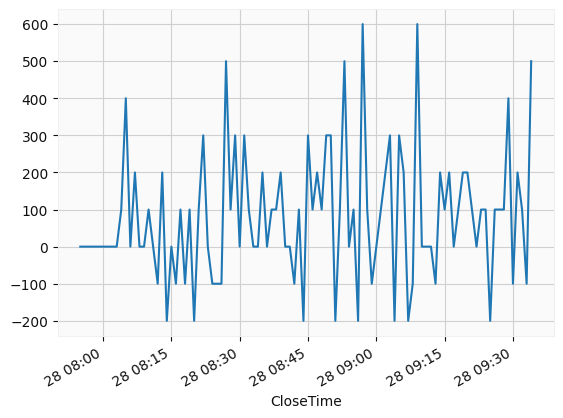

In [70]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

In [1]:
"""
X value for DecisionTreeClassifier

X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

X= df.drop(columns=['Id','Symbol','Time'])
print(X)
"""
df=pd.read_csv(r"Dummy - Sheet1.csv")
print(df)
X=df.iloc[:,1:3]

print(X)

NameError: name 'pd' is not defined

In [36]:
"""
y value for DecisionTreeClassifier

"""

y=df.iloc[:,-1]
print(y)


0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    1
Name: 1, dtype: int64


In [38]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

In [39]:
model.fit(X, y)

DecisionTreeClassifier()

In [41]:
# model.predict([  [40, 0],[60, 1] ])
model.predict([ [3,100] ])
print(model.predict([ [10214,100] ]))

[0]


C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
